In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("ex1data1.txt", delimiter = ',')
X = data[:,0]
y = data[:,1]
m = len(y)

Text(0.5,1,'Figure 1')

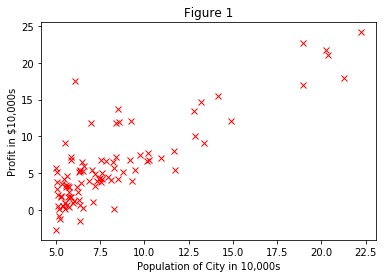

In [3]:
%matplotlib inline
plt.plot(X,y,'rx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Figure 1')

# Gradient Descent

Add column of ones to include theta_0 in the cost calculation

In [4]:
X_1 = np.vstack((np.ones(m),X)).T
theta_0 = np.zeros(2)


Cost Function for J(theta)

In [13]:
def computeCost(X, y, theta):
    J = 0
    m = len(y)
    h_0 = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h_0-y))
    
    return J

In [14]:
computeCost(X_1,y,theta_0)

32.072733877455676

In [15]:
iters = 1500
alpha = 0.01

In [16]:
def gradient_descent(X, y, m, theta, alpha,num_iters):
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        h_0 = X.dot(theta)
        theta = theta - alpha*(1/m)*(theta.dot(X.T)-y).dot(X)
        J_history[i] = computeCost(X, y, theta)
    
    return theta, J_history

In [17]:
theta, J_history = gradient_descent(X_1, y, m, theta_0, alpha, iters)

In [12]:
print("Theta found by gradient descent: %.3f, %.3f" % (theta[0],theta[1]))

Theta found by gradient descent: -3.630, 1.166


In [20]:
J_history

array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
       4.48338826])

Plot cost vs. steps

Text(0,0.5,'Cost J')

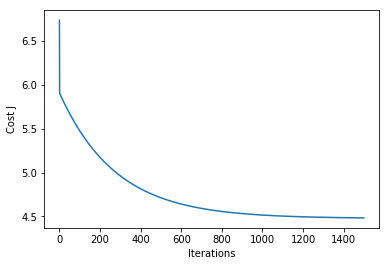

In [13]:
plt.figure()
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost J")

Now we can return to our original plot and add the theta values for slope and intercept

Text(0.5,1,'Figure 2')

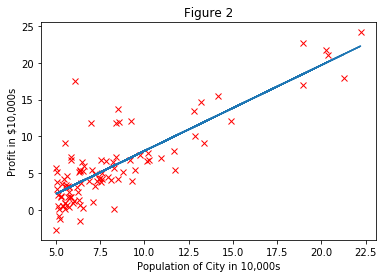

In [24]:
plt.plot(X,y,'rx')
x_range = np.linspace(min(X), max(X), 100)
plt.plot(X, (theta[0] + theta[1]*X))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Figure 2')

Predicting profit with population of 35,000 and 70,000

In [34]:
print("Profit predicted from 35,000 population: $%.3f" % (((theta[0] + 3.5*theta[1]) * 10000)))
print("Profit predicted from 35,000 population: $%.3f" % (((theta[0] + 7.0*theta[1])*10000)))

Profit predicted from 35,000 population: $4519.768
Profit predicted from 35,000 population: $45342.450


Now we can use the Normal Equation and see what differences are found in the slope and intercept

In [42]:
theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional